# Fareeha Hayat

## Research question/interests

The Metacritic video game dataset can be used as a tool to analyze different trends that arise by comparing different columns, because of the different kinds of information each provides. A video game has a developer, and a developer may have multiple video games. Similarly, a video game has a genre, and a genre may apply to many different video games. Video game genres wax and wane in popularity. Also, video game developers do not necessarily restrict themselves to one particular genre. I wanted to explore the relationship between developer and genre: is there a specific genre that a developer tends to develop games of? If so, has this trend changed over the years for any particular developer, or has it remained largely the same?

## Import Statements

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import sys
import matplotlib.pyplot as plt

## Load Data

First we will load in the csv file of our data.

In [ ]:
df = pd.read_csv(r"../data/processed/games-data-processed.csv")
df.head()

,name,platform,r-date,developer,genre,players
0,The Legend of Zelda: Ocarina of Time,Nintendo64,23-Nov-98,Nintendo,"Action Adventure,Fantasy",1 Player
1,Tony Hawk's Pro Skater 2,PlayStation,20-Sep-00,NeversoftEntertainment,"Sports,Alternative,Skateboarding",02-Jan
2,Grand Theft Auto IV,PlayStation3,29-Apr-08,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player
3,SoulCalibur,Dreamcast,08-Sep-99,Namco,"Action,Fighting,3D",02-Jan
4,Grand Theft Auto IV,Xbox360,29-Apr-08,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player


## Cleaned Data

Next is to clean up the data.

Unused columns will be dropped, as well any potential rows with null values.

In [ ]:
# dropping columns unused for this data analysis: name, platform, and players
df = df.drop(columns=["name", "platform", "players"])

# dropping rows with null values for developer and genre
df = df.dropna(axis=0, subset=["developer"])
df = df.dropna(axis=0, subset=["genre"])

# print number of rows and first five rows
print(df.count())
df.head()

r-date       17944
developer    17944
genre        17944
dtype: int64


,r-date,developer,genre
0,23-Nov-98,Nintendo,"Action Adventure,Fantasy"
1,20-Sep-00,NeversoftEntertainment,"Sports,Alternative,Skateboarding"
2,29-Apr-08,RockstarNorth,"Action Adventure,Modern,Modern,Open-World"
3,08-Sep-99,Namco,"Action,Fighting,3D"
4,29-Apr-08,RockstarNorth,"Action Adventure,Modern,Modern,Open-World"


Values in the Developer and Genre columns will be formatted correctly.

In [ ]:
# add space between words in developer
df["Developer"] = df["developer"].str.replace(r"(?<=[a-z])(?=[A-Z])", " ", regex=True).str.strip()

# add space after commas in Developer
df["Developer"] = df["Developer"].str.replace(",", ", ").str.strip()

# make new column of developers
df = df.drop(columns="developer")

# split genre column into list separated by commas
df["Genre"] = df["genre"].str.split(",")

# remove duplicate genres
df["Genre"] = df["Genre"].apply(pd.unique)

# make new column of list of genres without duplicate genres and drop old genre column
df = df.drop(columns="genre")

df.head()

,r-date,Developer,Genre
0,23-Nov-98,Nintendo,"[Action Adventure, Fantasy]"
1,20-Sep-00,Neversoft Entertainment,"[Sports, Alternative, Skateboarding]"
2,29-Apr-08,Rockstar North,"[Action Adventure, Modern, Open-World]"
3,08-Sep-99,Namco,"[Action, Fighting, 3D]"
4,29-Apr-08,Rockstar North,"[Action Adventure, Modern, Open-World]"


## Process and Wrangle Data

Now the data will be processed and wrangled to conduct our analysis.

A new column will be created for the release years, which will be used to analyze trends over time.

In [ ]:
# convert release dates to datetime objects
datetimes = pd.to_datetime(df["r-date"])

# make new column of release date
df["Release Date"] = datetimes
df = df.drop(columns="r-date")

# make new column of release year
df["Release Year"] = df["Release Date"].dt.year

df.head()

,Developer,Genre,Release Date,Release Year
0,Nintendo,"[Action Adventure, Fantasy]",1998-11-23,1998
1,Neversoft Entertainment,"[Sports, Alternative, Skateboarding]",2000-09-20,2000
2,Rockstar North,"[Action Adventure, Modern, Open-World]",2008-04-29,2008
3,Namco,"[Action, Fighting, 3D]",1999-09-08,1999
4,Rockstar North,"[Action Adventure, Modern, Open-World]",2008-04-29,2008


New rows will be created to separate the genres, so they can be counted and analyzed individually.

In [ ]:
# separating genres in list to individual rows
df = df.explode("Genre")
df.head(15)

,Developer,Genre,Release Date,Release Year
0,Nintendo,Action Adventure,1998-11-23,1998
0,Nintendo,Fantasy,1998-11-23,1998
1,Neversoft Entertainment,Sports,2000-09-20,2000
1,Neversoft Entertainment,Alternative,2000-09-20,2000
1,Neversoft Entertainment,Skateboarding,2000-09-20,2000
2,Rockstar North,Action Adventure,2008-04-29,2008
2,Rockstar North,Modern,2008-04-29,2008
2,Rockstar North,Open-World,2008-04-29,2008
3,Namco,Action,1999-09-08,1999
3,Namco,Fighting,1999-09-08,1999


## Method Chain

All the previous steps will be executed using a method chain.

In [ ]:
import project_functions2 as pf2

df = pf2.load_and_process(r"../data/processed/games-data-processed.csv")
df.head(15)

,Release Date,Developer,Genre,Release Year
0,23-Nov-98,Nintendo,Action Adventure,1998
0,23-Nov-98,Nintendo,Fantasy,1998
1,20-Sep-00,Neversoft Entertainment,Sports,2000
1,20-Sep-00,Neversoft Entertainment,Alternative,2000
1,20-Sep-00,Neversoft Entertainment,Skateboarding,2000
2,29-Apr-08,Rockstar North,Action Adventure,2008
2,29-Apr-08,Rockstar North,Modern,2008
2,29-Apr-08,Rockstar North,Open-World,2008
3,08-Sep-99,Namco,Action,1999
3,08-Sep-99,Namco,Fighting,1999


## Data Analysis

We want to answer questions about the relationship between the **developer** and the **genre**. To do so, we will need to create some data visualizations.

---

The columns will be limited to specific genres and developers, for visualization purposes.

In [ ]:
# selecting specific genres
list_genres = df["Genre"].value_counts().iloc[:75].rename_axis("Genre").reset_index(name='count')
df = df.loc[df["Genre"].isin(list_genres["Genre"])]

# selecting specific developers
list_devs = df["Developer"].value_counts().iloc[:30].rename_axis("Developer").reset_index(name='count')
df = df.loc[df["Developer"].isin(list_devs["Developer"])]

df.head(15)

,Release Date,Developer,Genre,Release Year
0,23-Nov-98,Nintendo,Action Adventure,1998
0,23-Nov-98,Nintendo,Fantasy,1998
3,08-Sep-99,Namco,Action,1999
3,08-Sep-99,Namco,Fighting,1999
3,08-Sep-99,Namco,3D,1999
5,12-Nov-07,Nintendo,Action,2007
5,12-Nov-07,Nintendo,Platformer,2007
5,12-Nov-07,Nintendo,3D,2007
11,06-Nov-00,Treyarch,Sports,2000
11,06-Nov-00,Treyarch,Alternative,2000


A distrubtion plot will be created to visualize the counts of different genres, allowing us to see the most popular ones.

<seaborn.axisgrid.FacetGrid>

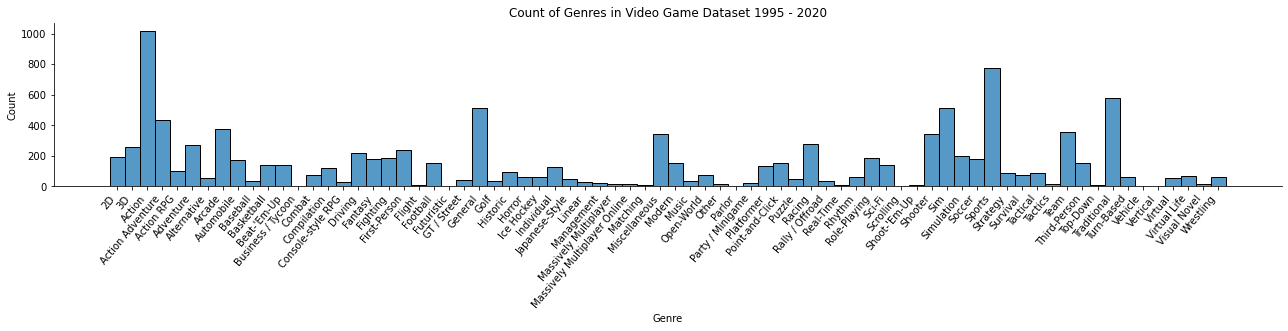

In [ ]:
# sort genre alphabetically
df = df.sort_values("Genre")

# plot distribution of genres
genre_plot = sns.displot(data=df, x=df["Genre"], height=3, aspect=6)
genre_plot.set(xlabel="Genre", ylabel="Count", title="Count of Genres in Video Game Dataset 1995 - 2020")
genre_plot.set_xticklabels(rotation=50, ha="right")

According to this distribution plot, games in the dataset tend to fall in the genres of action, general, role-playing, miscellaneous, sports, action-adventure, and adventure.

---

A count plot will be created to visualize the different developers, allowing us to see the most popular ones.

[Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'Developer'),
 Text(0.5, 1.0, 'Count of Developers in Video Game Dataset 1995 - 2020')]

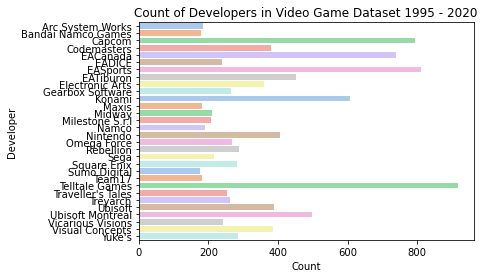

In [ ]:
# sort developer alphabetically
df = df.sort_values("Developer")

# plot count of developers
dev_plot = sns.countplot(y=df["Developer"], palette="pastel")
dev_plot.set(xlabel="Count", ylabel="Developer", title="Count of Developers in Video Game Dataset 1995 - 2020")

The count plot shows the developers which create the most games. Telltale Games,  EA Sports, Capcom, EA Canada, Konami, Ubisoft Montreal, EA Tiburon, and Nintendo are among the biggest developers.

---

We will create another distribution plot, this time with the most popular developers showing counts for all of their genres.

<seaborn.axisgrid.FacetGrid>

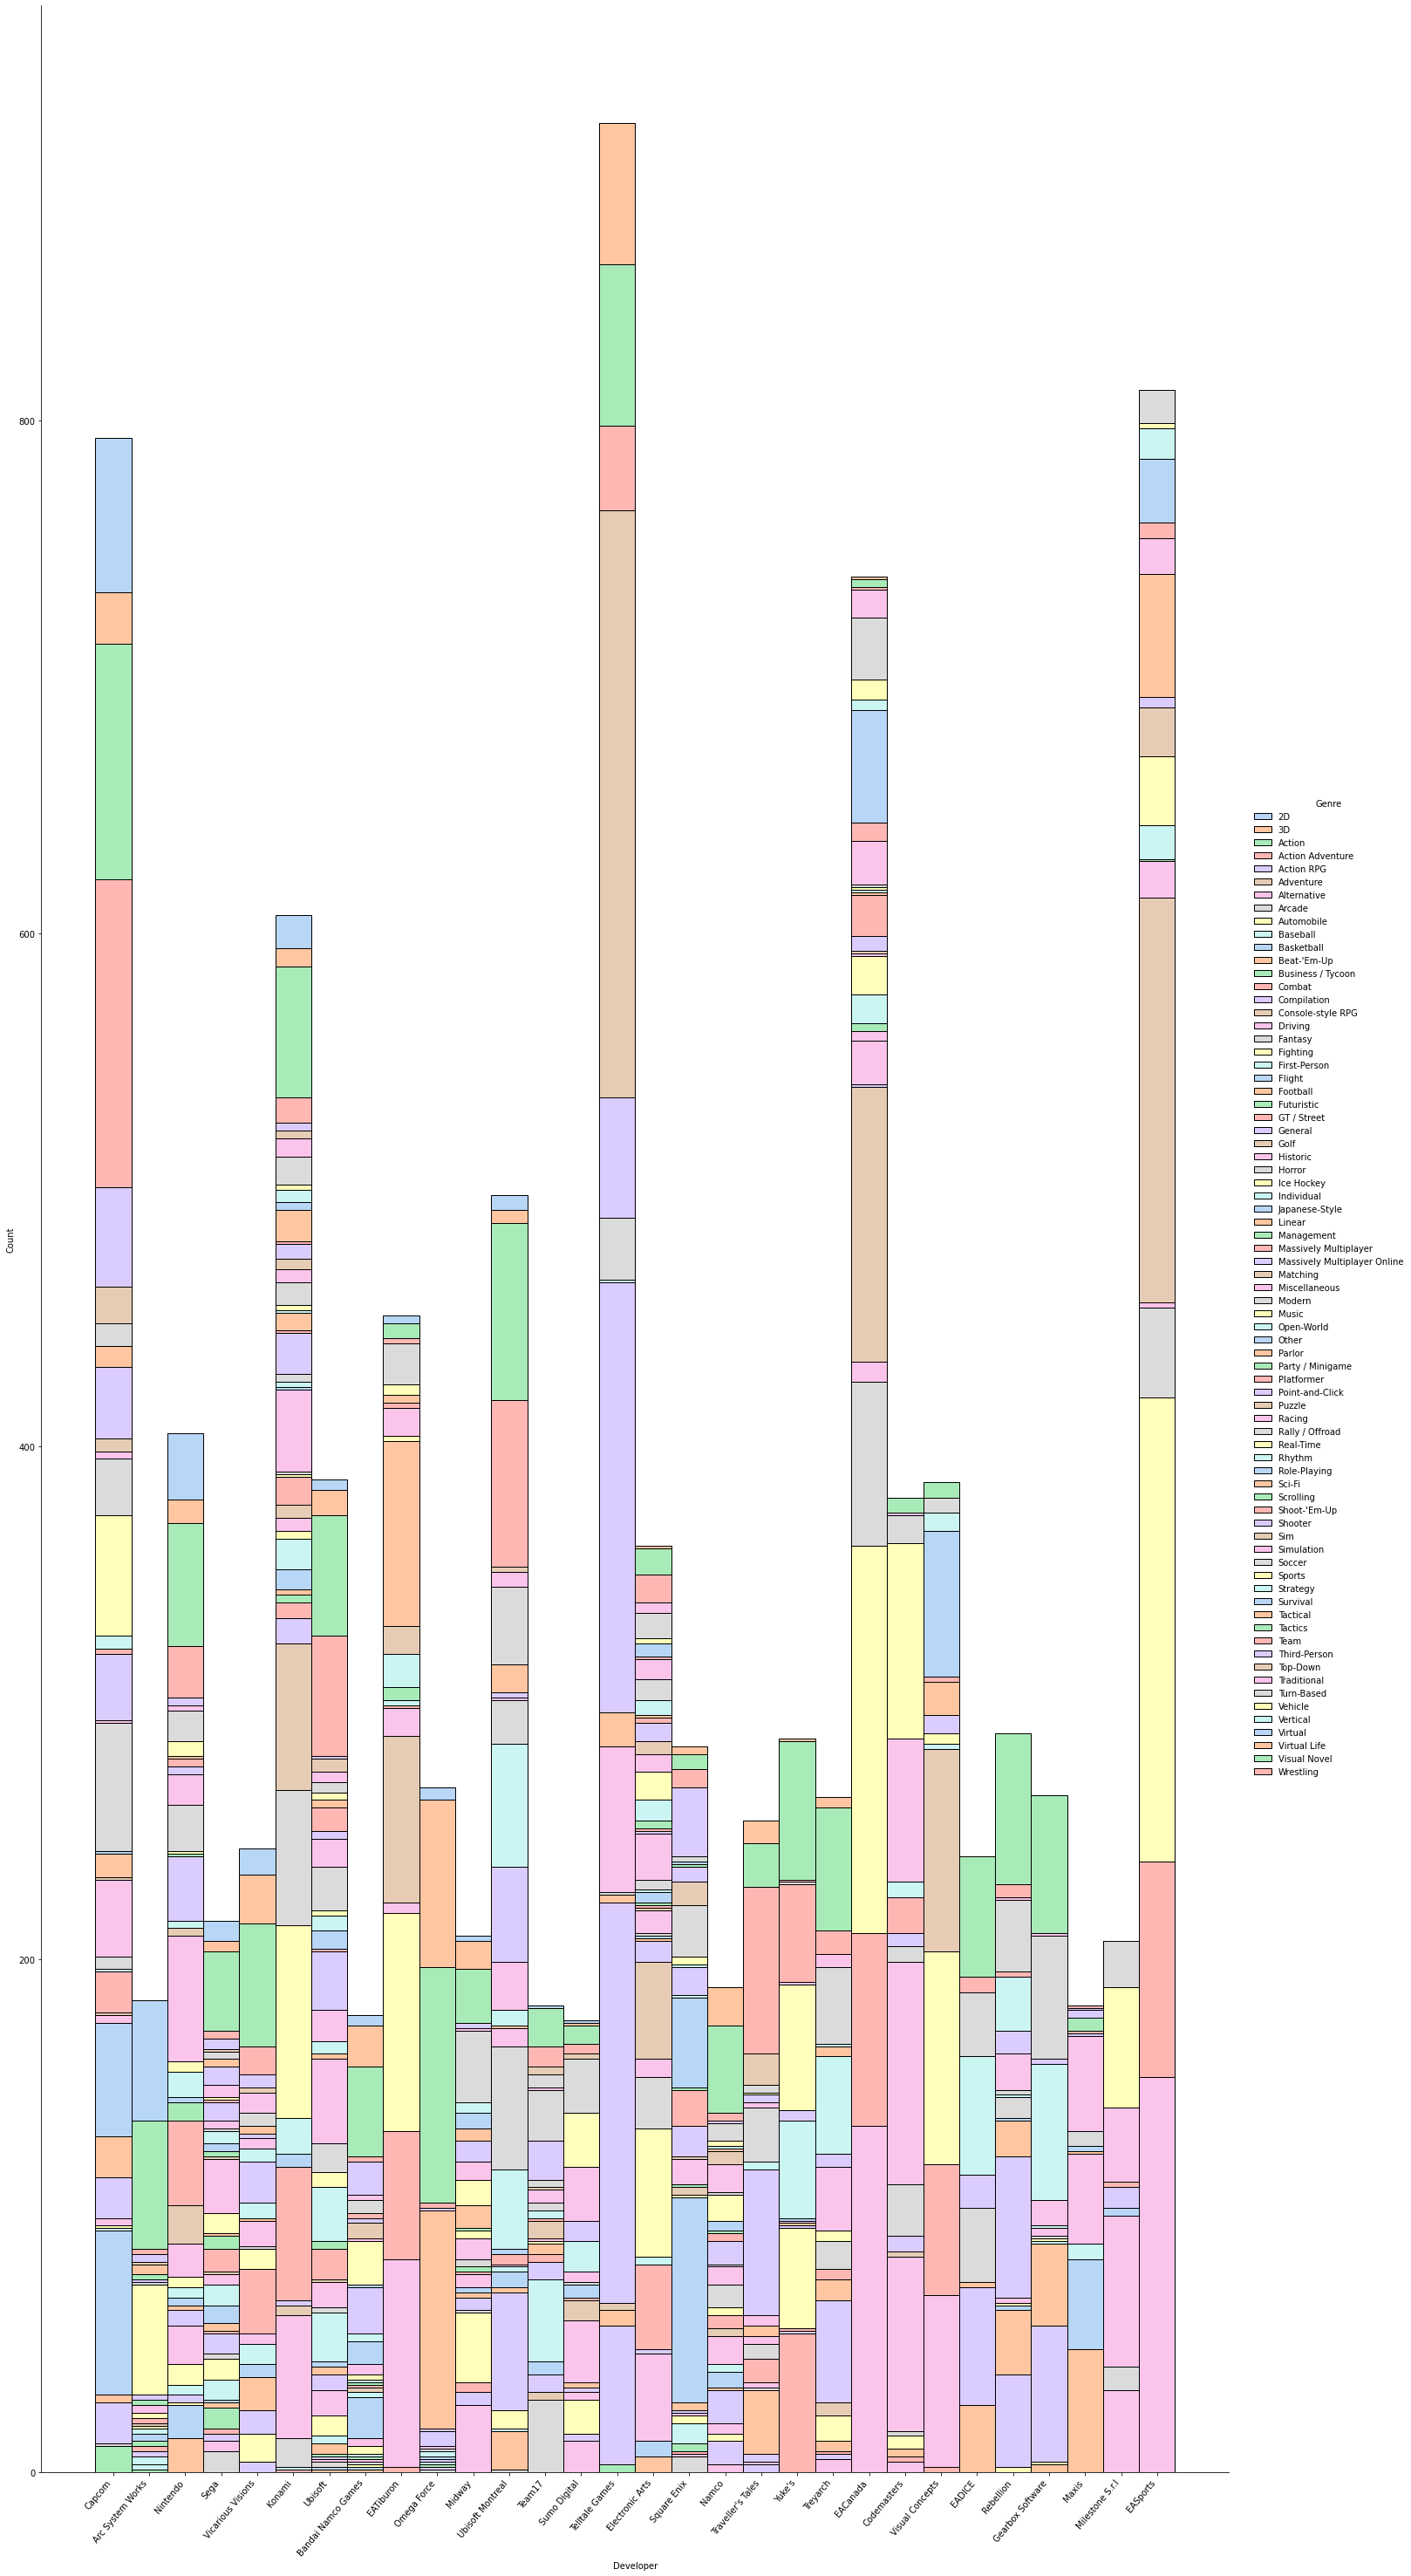

In [ ]:
# sort genre alphabetically
df = df.sort_values("Genre")

# plot distribution of developers and their genres
dev_gen_plot = sns.displot(df, x=df["Developer"], hue=df["Genre"], multiple="stack", height=40, aspect=0.5, palette="pastel")
dev_gen_plot.set_xticklabels(rotation=50, ha="right")

As we can see, it is difficult to view some of the counts, despite enlarging the plot and having a limited amount of genres. However we can still get a general view of a developer and their most common genre, and how they roughly compare to another developer.

---

We will expand on some specific developers, and take a look at the distribution of the genres for each.

First, we will look at Nintendo, who are famous for creating many family friendly games.

<seaborn.axisgrid.FacetGrid>

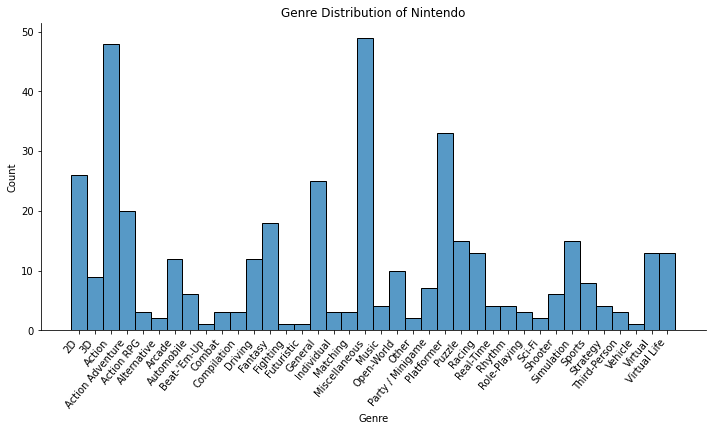

In [ ]:
# filter rows for specfic developer
nintendo = df.loc[df["Developer"] == "Nintendo"]
nintendo = nintendo.sort_values(by=["Genre"])

# plot distribution of genres for specific developer
nintendo_plot = sns.displot(data=nintendo["Genre"], height=5, aspect=2)
nintendo_plot.set(title="Genre Distribution of Nintendo")
nintendo_plot.set_xticklabels(rotation=50, ha="right")

It is clear that Nintendo has more variety of genres than Telltale Games. They tend to create a lot of Miscellaneous, Action, Platformer, and 2D games. Platformers seem to fit the bill of "family friendly".

Now we will look at Capcom, another well known developer with many popular game franchises.

<seaborn.axisgrid.FacetGrid>

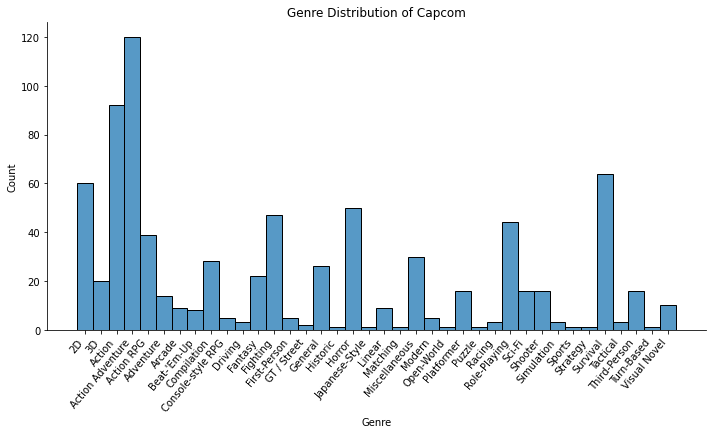

In [ ]:
# filter rows for specfic developer
capcom = df.loc[df["Developer"] == "Capcom"]
capcom = capcom.sort_values(by=["Genre"])

# plot distribution of genres for specific developer
capcom_plot = sns.displot(data=capcom["Genre"], height=5, aspect=2)
capcom_plot.set(title="Genre Distribution of Capcom")
capcom_plot.set_xticklabels(rotation=50, ha="right")

Like Nintendo, Capcom has a large variety of genres. It has numerous action-adventure and action games, as well as many 2D, survival, horror, fighting, and role-playing games.

Lastly, we will look at Square Enix, who are best known for their RPGs.

<seaborn.axisgrid.FacetGrid>

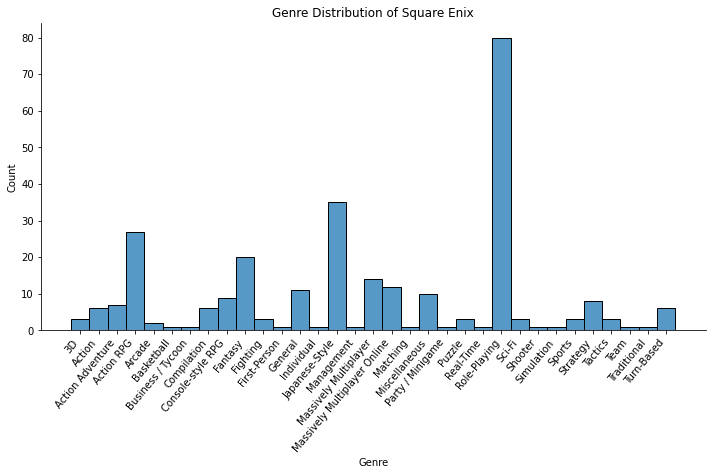

In [ ]:
# filter rows for specfic developer
squareenix = df.loc[df["Developer"] == "Square Enix"]
squareenix = squareenix.sort_values(by=["Genre"])

# plot distribution of genres for specific developer
squareenix_plot = sns.displot(data=squareenix["Genre"], height=5, aspect=2)
squareenix_plot.set(title="Genre Distribution of Square Enix")
squareenix_plot.set_xticklabels(rotation=50, ha="right")

Immediately we see that Square Enix lives up to our expectations. The most common genre by far is Role-Playing. Japanese-Style, Action RPG, and Fantasy are also common genres. They occasionally branch out to other genres, but it's quite evident that RPGs are their main focus.

---

Now that we have seen the genre distributions for several developers, let's take a closer look at specific genres for a certain developer. How does the counts of a genre vary throughout the years for this dataset?

We will take a look at the Action genre of Nintendo, and analyze the trend of the frequency it occurs between 1995 and 2020.

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, "Trend of Nintendo's Action Games from 1995 - 2020")]

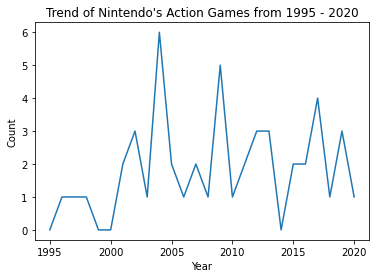

In [ ]:
# sorting values by year
df.sort_values(by="Release Year")

# creating nintendo_action dataframe for count of action genre per year
nintendo_action = nintendo.loc[nintendo["Genre"] == "Action"]
nintendo_action = nintendo_action.groupby(["Genre", "Release Year"])["Genre"].count()

# creating dates dataframe for missing years
dates = pd.DataFrame(range(1995,2021), columns=["Release Year"])
dates["Release Year"] = pd.to_datetime(dates["Release Year"])
dates["Release Year"] = dates["Release Year"].astype(np.int64)

# merging nintendo_action and dates to fill in missing rows in nintendo_action
nintendo_action = dates.merge(right=nintendo_action, how="outer", on="Release Year").fillna(0)

# rename column of counts to correct name
nintendo_action.rename(columns = {"Genre":"Count"}, inplace = True)

# plot line graph
nin_action_plot = sns.lineplot(nintendo_action, x="Release Year", y=nintendo_action["Count"])
nin_action_plot.set(xlabel="Year", ylabel="Count", title="Trend of Nintendo's Action Games from 1995 - 2020")

Nintendo appears to have many Action games in the years 2004, 2009, and 2017. There are no Action games in this dataset in the years 1995, 1999, 2000, and 2014. Overall, the trend of Nintendo's Action games is dynamic: it varies greatly over different years.

Using this data analysis, we can also find the mean amount of Action games per year.

In [ ]:
# calculating mean from dataframe
mean_nin_action = round(nintendo_action["Count"].mean(), 2)
print("The mean number of Action games from Nintendo per year: " + str(mean_nin_action))

The mean number of Action games from Nintendo per year: 1.85


Let's take a look at another genre for comparison: Platformer.

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, "Trend of Nintendo's Platformer Games from 1995 - 2020")]

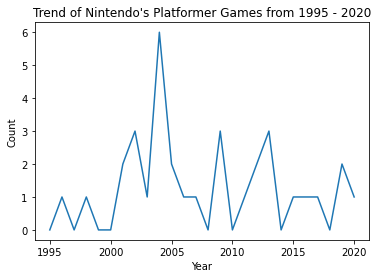

In [ ]:
# sorting values by year
df.sort_values(by="Release Year")

# creating nintendo_platformer dataframe for count of platformer genre per year
nintendo_platformer = nintendo.loc[nintendo["Genre"] == "Platformer"]
nintendo_platformer = nintendo_platformer.groupby(["Genre", "Release Year"])["Genre"].count()

# creating dates dataframe for missing years
dates = pd.DataFrame(range(1995,2021), columns=["Release Year"])
dates["Release Year"] = pd.to_datetime(dates["Release Year"])
dates["Release Year"] = dates["Release Year"].astype(np.int64)

# merging nintendo_platformer and dates to fill in missing rows in nintendo_platformer
nintendo_platformer = dates.merge(right=nintendo_platformer, how="outer", on="Release Year").fillna(0)

# rename column of counts to correct name
nintendo_platformer.rename(columns = {"Genre":"Count"}, inplace = True)

# plot line graph
nin_platformer_plot = sns.lineplot(nintendo_platformer, x="Release Year", y=nintendo_platformer["Count"])
nin_platformer_plot.set(xlabel="Year", ylabel="Count", title="Trend of Nintendo's Platformer Games from 1995 - 2020")

We see a slightly different trend with the Platformer genre. There is a large amount of Platformer games in the year 2004, as well as a moderate amount from 2002, 2009, and 2013. This dataset shows no Platformer games in the following years: 1995, 1997, 1999, 2000, 2008, 2010, 2014, and 2018. That is more years of no games than the Action genre, 8 versus 4.

In [ ]:
# calculating mean from dataframe
mean_nin_platformer = round(nintendo_platformer["Count"].mean(), 2)
print("The mean number of Platformer games from Nintendo per year: " + str(mean_nin_platformer))

The mean number of Platformer games from Nintendo per year: 1.27


Nintendo makes less Platformer games on average than Action games per year.

---

We can conclude for Nintendo, based on the Action genre and the Platformer genre, Nintendo creates Action games more on average. The trend of Nintendo's games is dynamic for both genres, and for a given year it is more likely that an Action game will be made.